<h1 style="color:rgb(0,120,170)">Dense Hopfield Networks</h1>

<b>Authors:</b> Viet Tran, Hubert Ramsauer, Johannes Brandstetter<br>
<b>Date:</b> 16-09-2020

<h3 style="color:rgb(0,120,170)">Theory Dense Hopfield Networks</h3>
Here we try out the modern form of a Hopfield network, which is described  in equation 12 in the <a href="https://ml-jku.github.io/hopfield-layers/">blog</a>:
$$\begin{equation}
\text{E} = -\sum_{i=1}^N \text{exp}(\boldsymbol{x}_i^T\boldsymbol{\xi}) \ , \tag{12}
\label{eq:energy_demircigil}
\end{equation}$$

We will use images of the Simpsons family as input patterns $x_i$ and then try to retrieve a modified image of Homer. The governing formular for the retrieval process of the masked image $\xi$ is

$$\begin{equation}
\boldsymbol{\xi}^{\text{new}}[l] =  \text{sgn}\bigg[\sum_{i=1}^N \text{exp}\big(\boldsymbol{x}_i^T ~ \boldsymbol{\xi}^{(l+)} \big) - \sum_{i=1}^N \text{exp}(\boldsymbol{x}_i^T ~ \boldsymbol{\xi}^{(l-)} \big)  \bigg] \ , \tag{17}
\label{eq:restorage_demircigil}
\end{equation}$$

This basic experiment is repeated for different number and combinations of input patterns.    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import os
import itertools as it

import utils
from models import DenseHopfield

<h3 style="color:rgb(0,120,170)"> Loading and preprocessing of images </h3>
First we load the images from file and convert the pixels to binary values. The black pixels correspond to $+1$ and white ones to $-1$. Afterwards the lower half of each $64\times64$ black and white picture is masked with $+1$. The result is plotted below. Finally to use those images as pattern vectors we reshape the matrices to $4096$ dimensional vectors accordingly. 

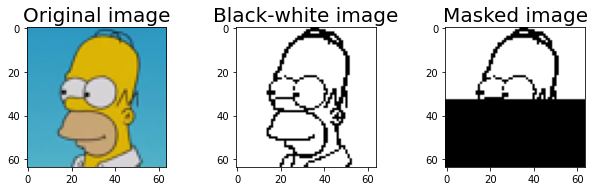

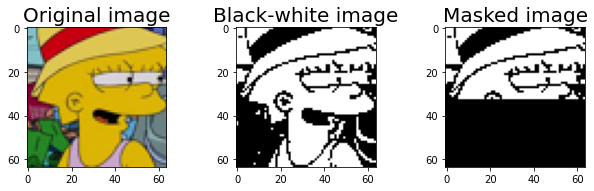

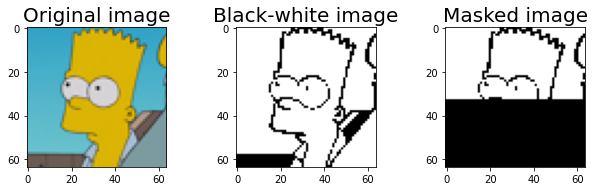

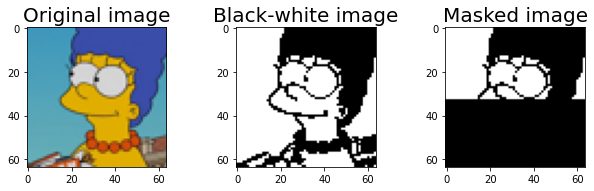

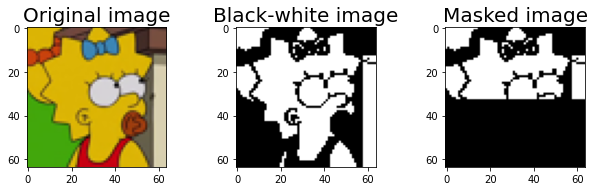

In [2]:
image_paths = [os.path.join('simpsons_faces','homer', '13.png'),
              os.path.join('simpsons_faces','lisa', '8.png'),
              os.path.join('simpsons_faces','bart', '28.png'),
              os.path.join('simpsons_faces','marge', '1099.png'),
              os.path.join('simpsons_faces','maggie', '18.png'),
              ]
n_pixel = 64
orig_shape = n_pixel,n_pixel
N = np.prod(orig_shape)
images = utils.load_images(image_paths, n_pixel)
images_np = utils.convert_images(images, 'black-white')
images_masked_np = utils.mask_lower_half_image(images_np, value=+1)
utils.plot_images_loaded_converted_masked(images, images_np, images_masked_np)

images_np = [im_np.reshape(-1, 1) for im_np in images_np] # vectorize
images_masked_np = [im_np.reshape(-1, 1) for im_np in images_masked_np] # vectorize


<h3 style="color:rgb(0,120,170)"> Single pattern expriment </h3>
First we try to reconstruct the masked Homer from the orginal Homer pattern. Note that the variable train needs to be a list of input patterns.  

100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


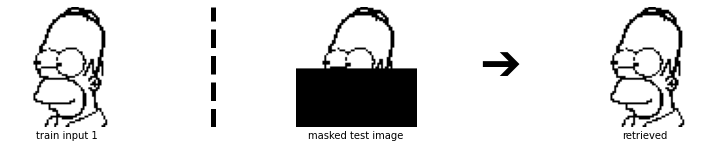

In [3]:
net = DenseHopfield(N)
train = [images_np[0]] # Homer is at position 0
net.learn(train)
test = images_masked_np[0] # Homer is at position 0
reconstructed = net.retrieve(test, max_iter=1)
reconstructed = reconstructed.reshape(orig_shape)
orig_image = images_np[0]

utils.plot_experiment_blog_style(train, [test, reconstructed], orig_shape)

<h3 style="color:rgb(0,120,170)"> Optional full multi pattern experiment with 5 patterns </h3>
Here we are going to test all combinations of $k$ training inputs (same image can be taken multiple times) and show the retrieval of Homer. We also gradually increase the size $k$ of the training input list to test the deteriorating retrieval process for increasing number of patterns. Homer is always included into the training inputs since we want to retrieve him later.
To do those optional experiments set the flag <code>do_optional=True<code>.

In [4]:
do_optional = False # set True to execute optional experiments

In [5]:
num_img_wo_homer = len(images_np)-1
if do_optional:
    tot_num_experiments = sum(utils.calc_combinations_with_replacement(num_img_wo_homer, k) for k in range(num_img_wo_homer+1))

    test = images_masked_np[0].reshape(-1,1) # always try to retrieve homer

    print('Starting %d experiments...' %tot_num_experiments)
    experiment_idx = 0
    for k in range(num_img_wo_homer+1):
        for train_patterns in it.combinations_with_replacement(images_np[1:], k):
            train_patterns = list(train_patterns)
            train_patterns.insert(0, images_np[0]) # always include homer into learning patterns
            net = DenseHopfield(N)
            net.learn(train_patterns)

            reconstructed = net.retrieve(test, max_iter=1)
            reconstructed = np.array(reconstructed)

            utils.plot_experiment(train_patterns, [test, reconstructed], experiment_idx, orig_shape)

            experiment_idx += 1
            print('experiment [%d/%d]'%(experiment_idx, tot_num_experiments))

<h3 style="color:rgb(0,120,170)"> Interesting cases of multi pattern experiments with 5 patterns </h3>
Observing the optional experiments leads to interesting results at experiments 6 and 12. We repeat those and save the output:

100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


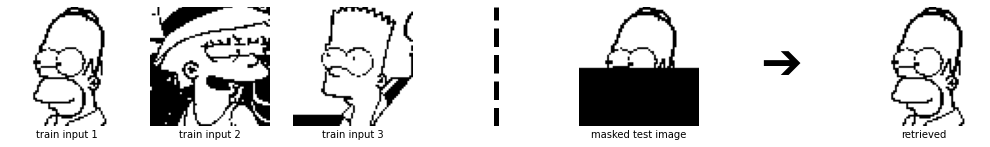

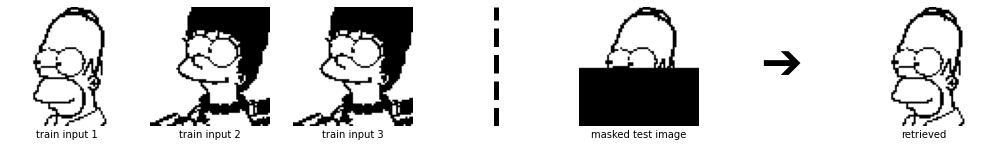

In [6]:
experiment_idx = 0
for k in range(num_img_wo_homer+1):
    for train_patterns in it.combinations_with_replacement(images_np[1:], k):
        if experiment_idx in [6,12]:
            train_patterns = list(train_patterns)
            train_patterns.insert(0, images_np[0]) # always include homer into learning patterns
            net = DenseHopfield(N)
            net.learn(train_patterns)

            reconstructed = net.retrieve(test, max_iter=1)

            utils.plot_experiment_blog_style(train_patterns, [test, reconstructed], orig_shape)
            plt.savefig("experiment_%d.png"%experiment_idx, bbox_inches = 'tight', pad_inches=0, transparent=True,dpi=100)
        experiment_idx += 1


<h3 style="color:rgb(0,120,170)"> Load more images to extend experiments </h3>
In the following we will try similar experiments with more input patterns. We repeat the preprocessing steps from before for the below 8 images.

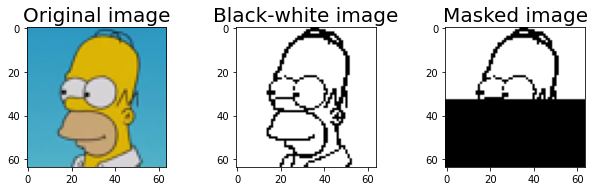

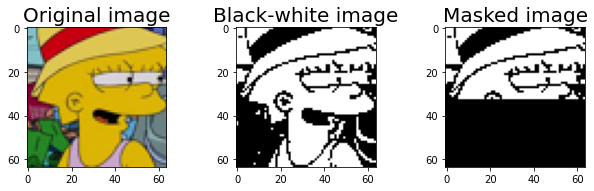

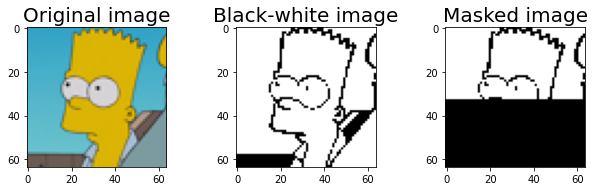

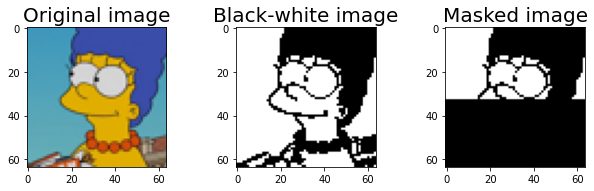

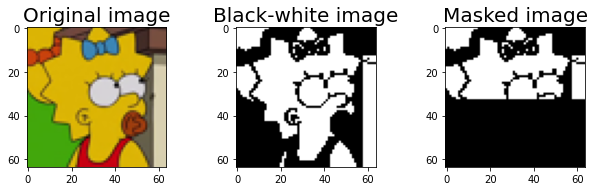

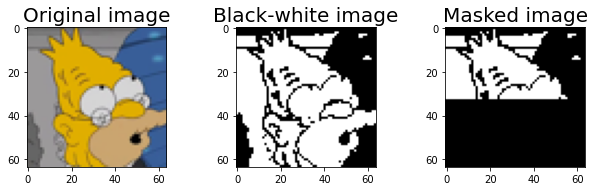

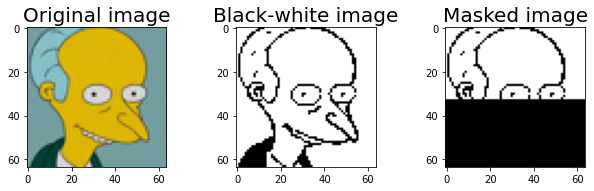

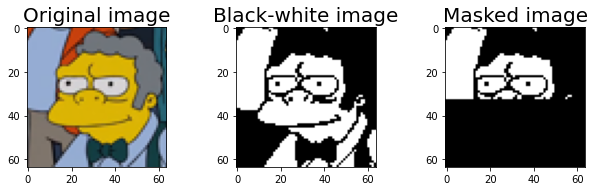

In [7]:
image_paths = [os.path.join('simpsons_faces','homer', '13.png'),
              os.path.join('simpsons_faces','lisa', '8.png'),
              os.path.join('simpsons_faces','bart', '28.png'),
              os.path.join('simpsons_faces','marge', '1099.png'),
              os.path.join('simpsons_faces','maggie', '18.png'),
              os.path.join('simpsons_faces','grampa', '1144.png'),
              os.path.join('simpsons_faces','mrburns', '469.png'),
              os.path.join('simpsons_faces','moe', '100.png'),
              ]

images = utils.load_images(image_paths, n_pixel)
images_np = utils.convert_images(images, 'black-white')
images_masked_np = utils.mask_lower_half_image(images_np, value=+1)
utils.plot_images_loaded_converted_masked(images, images_np, images_masked_np)

images_np = [im_np.reshape(-1, 1) for im_np in images_np] # vectorize
images_masked_np = [im_np.reshape(-1, 1) for im_np in images_masked_np] # vectorize


<h3 style="color:rgb(0,120,170)"> Optional full multi pattern experiment with 7 patterns </h3>
This step tests all combinations of training inputs, but this time we will not take the same image multiple times as input. This decreases the number of experiments but can still take some time. Thus this step is again optional. 

In [8]:
num_img_wo_homer = len(images_np)-1
if do_optional:
    tot_num_experiments = sum(utils.binomial(num_img_wo_homer, k) for k in range(num_img_wo_homer+1))

    test = images_masked_np[0].reshape(-1,1) # always try to retrieve homer

    print('Starting %d experiments...' %tot_num_experiments)
    experiment_idx = 0
    for k in range(num_img_wo_homer+1):
        for train_patterns in it.combinations(images_np[1:], k):
            if experiment_idx:
                train_patterns = list(train_patterns)
            else:
                train_patterns = []
            train_patterns.insert(0, images_np[0]) # always include homer into learning patterns
            net = DenseHopfield(N)
            net.learn(train_patterns)

            reconstructed = net.retrieve(test, max_iter=1)

            utils.plot_experiment(train_patterns, [test, reconstructed], experiment_idx, orig_shape)

            experiment_idx += 1
            print('experiment [%d/%d]'%(experiment_idx, tot_num_experiments))

<h3 style="color:rgb(0,120,170)"> Interesting cases of multi pattern experiments with 7 patterns </h3>
We pick experiment 115 as an interesting case and save the output:

100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


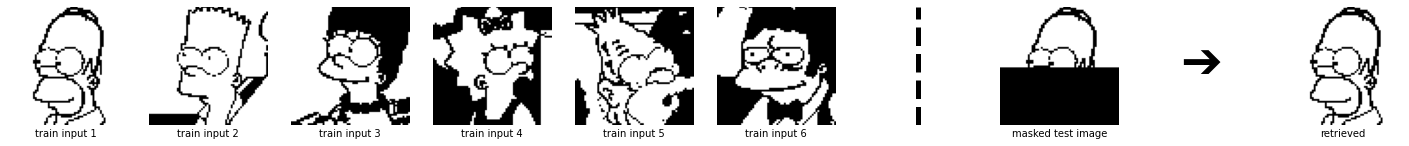

In [9]:
experiment_idx = 0
for k in range(num_img_wo_homer+1):
    for train_patterns in it.combinations(images_np[1:], k):
        if experiment_idx:
            train_patterns = list(train_patterns)
        else:
            train_patterns = []
        if experiment_idx in [115]:
            train_patterns.insert(0, images_np[0]) # always include homer into learning patterns
            net = DenseHopfield(N)
            net.learn(train_patterns)

            reconstructed = net.retrieve(test, max_iter=1)
            reconstructed = np.array(reconstructed)

            utils.plot_experiment_blog_style(train_patterns, [test, reconstructed], orig_shape)
            plt.savefig("experiment_%d.png"%experiment_idx, bbox_inches = 'tight', pad_inches=0, transparent=True,dpi=100)
            
        experiment_idx += 1

<h3 style="color:rgb(0,120,170)"> Interesting cases of multi pattern experiments with 24 patterns </h3>
We again increase the number of images to 24 and test the retrieval with all images

/system/user/tran/zelle/cleaned_hopfield/utils.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


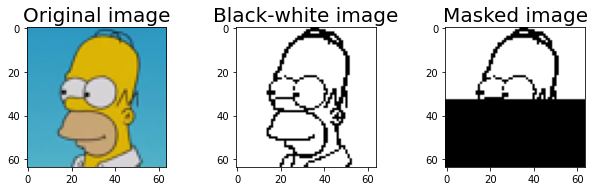

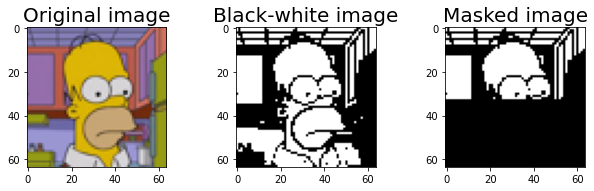

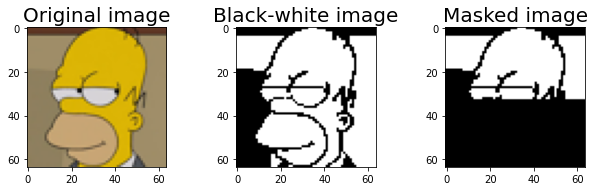

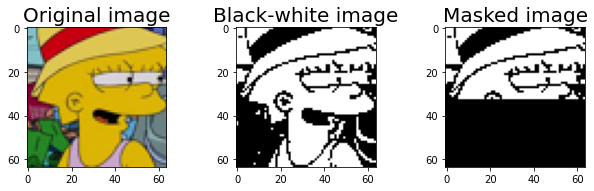

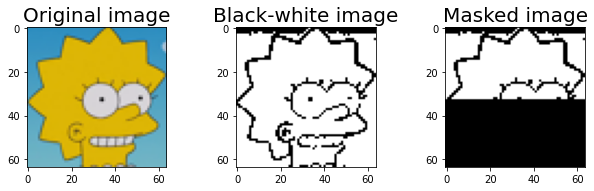

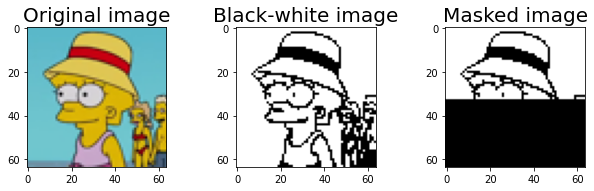

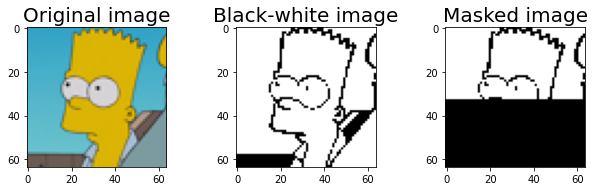

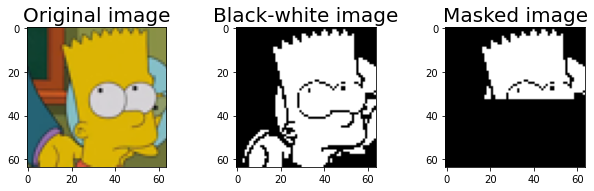

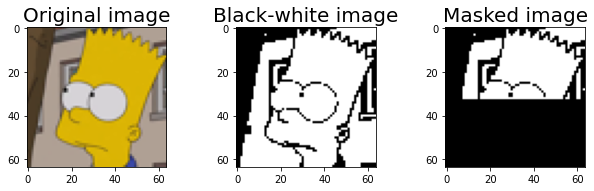

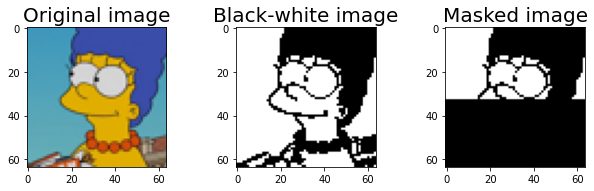

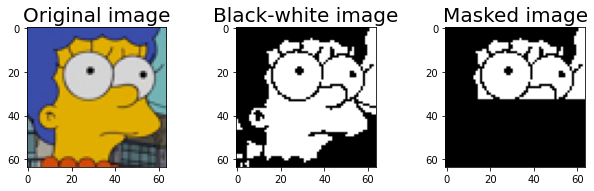

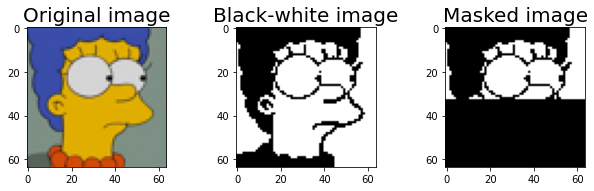

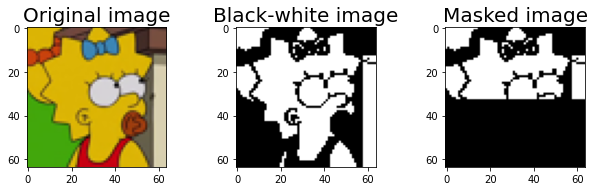

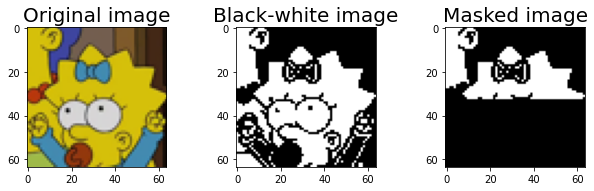

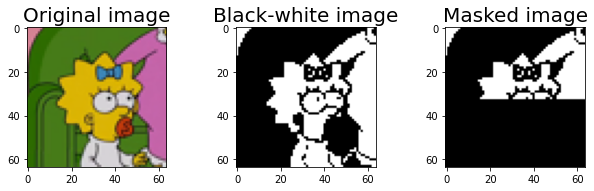

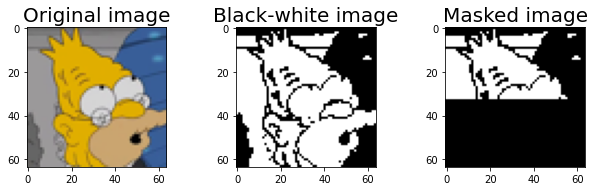

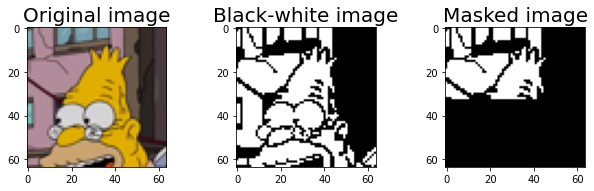

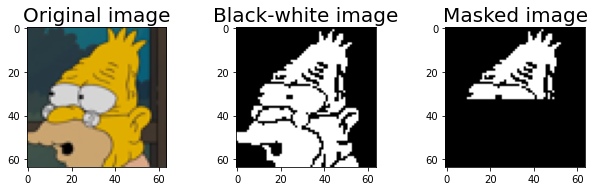

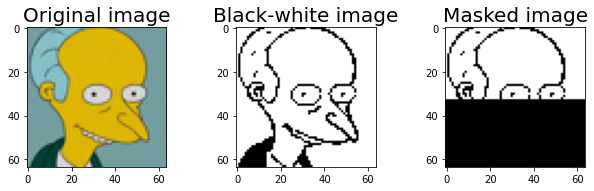

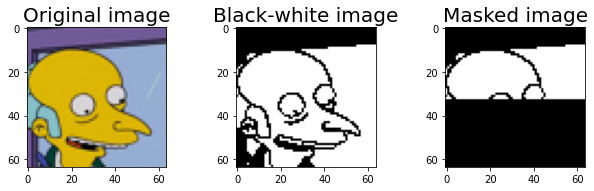

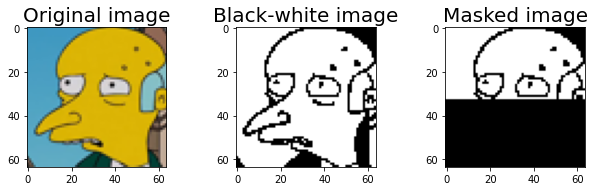

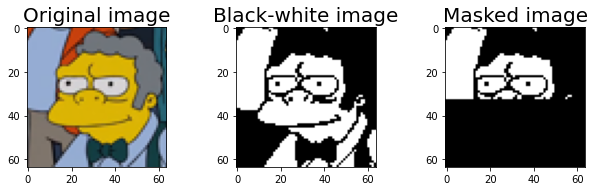

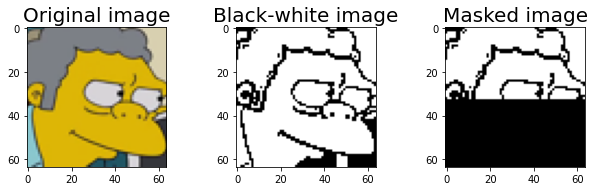

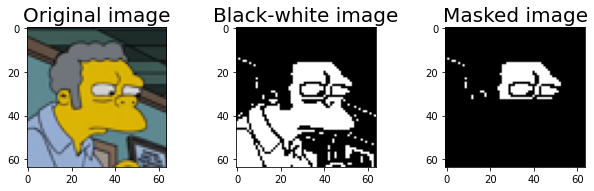

In [10]:
image_paths = [os.path.join('simpsons_faces','homer', '13.png'),
              os.path.join('simpsons_faces','homer', '240.png'),
              os.path.join('simpsons_faces','homer', '366.png'),
               #-----
              os.path.join('simpsons_faces','lisa', '8.png'),
              os.path.join('simpsons_faces','lisa', '443.png'),
              os.path.join('simpsons_faces','lisa', '16.png'),
               #-----
              os.path.join('simpsons_faces','bart', '28.png'),
              os.path.join('simpsons_faces','bart', '111.png'),
              os.path.join('simpsons_faces','bart', '169.png'),
               #-----
              os.path.join('simpsons_faces','marge', '1099.png'),
              os.path.join('simpsons_faces','marge', '1101.png'),
              os.path.join('simpsons_faces','marge', '1075.png'),
               #-----
              os.path.join('simpsons_faces','maggie', '18.png'),
              os.path.join('simpsons_faces','maggie', '3236.png'),
              os.path.join('simpsons_faces','maggie', '585.png'),
               #-----
              os.path.join('simpsons_faces','grampa', '1144.png'),
              os.path.join('simpsons_faces','grampa', '1104.png'),
              os.path.join('simpsons_faces','grampa', '1123.png'),
               #-----
              os.path.join('simpsons_faces','mrburns', '469.png'),
              os.path.join('simpsons_faces','mrburns', '480.png'),
              os.path.join('simpsons_faces','mrburns', '213.png'),
               #-----
              os.path.join('simpsons_faces','moe', '100.png'),
              os.path.join('simpsons_faces','moe', '2178.png'),
              os.path.join('simpsons_faces','moe', '78.png'),
              ]

images = utils.load_images(image_paths, n_pixel)
images_np = utils.convert_images(images, 'black-white')
images_masked_np = utils.mask_lower_half_image(images_np, value=+1)
utils.plot_images_loaded_converted_masked(images, images_np, images_masked_np)

images_np = [im_np.reshape(-1, 1) for im_np in images_np] # vectorize
images_masked_np = [im_np.reshape(-1, 1) for im_np in images_masked_np] # vectorize


100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


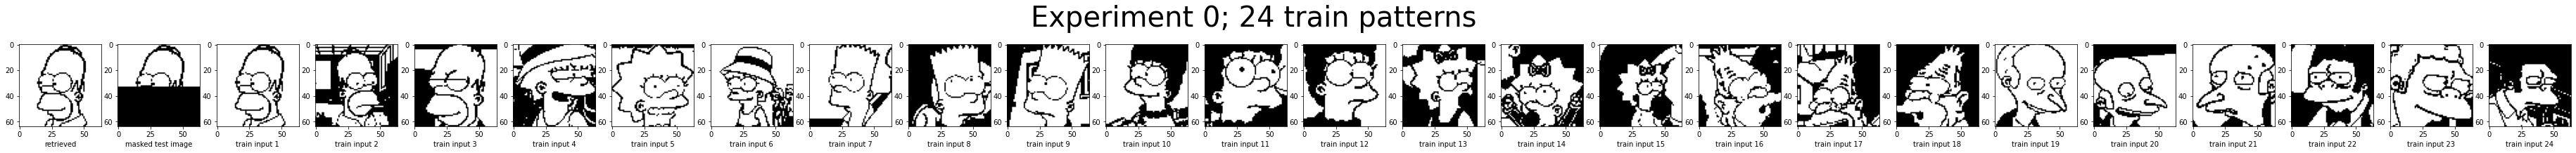

In [11]:
test = images_masked_np[0].reshape(-1,1) # always try to retrieve homer

train_patterns = images_np
net = DenseHopfield(N, beta=1)
net.learn(train_patterns)

reconstructed = net.retrieve(test, max_iter=1)
reconstructed = np.array(reconstructed)

utils.plot_experiment(train_patterns, [test, reconstructed], 0, orig_shape)

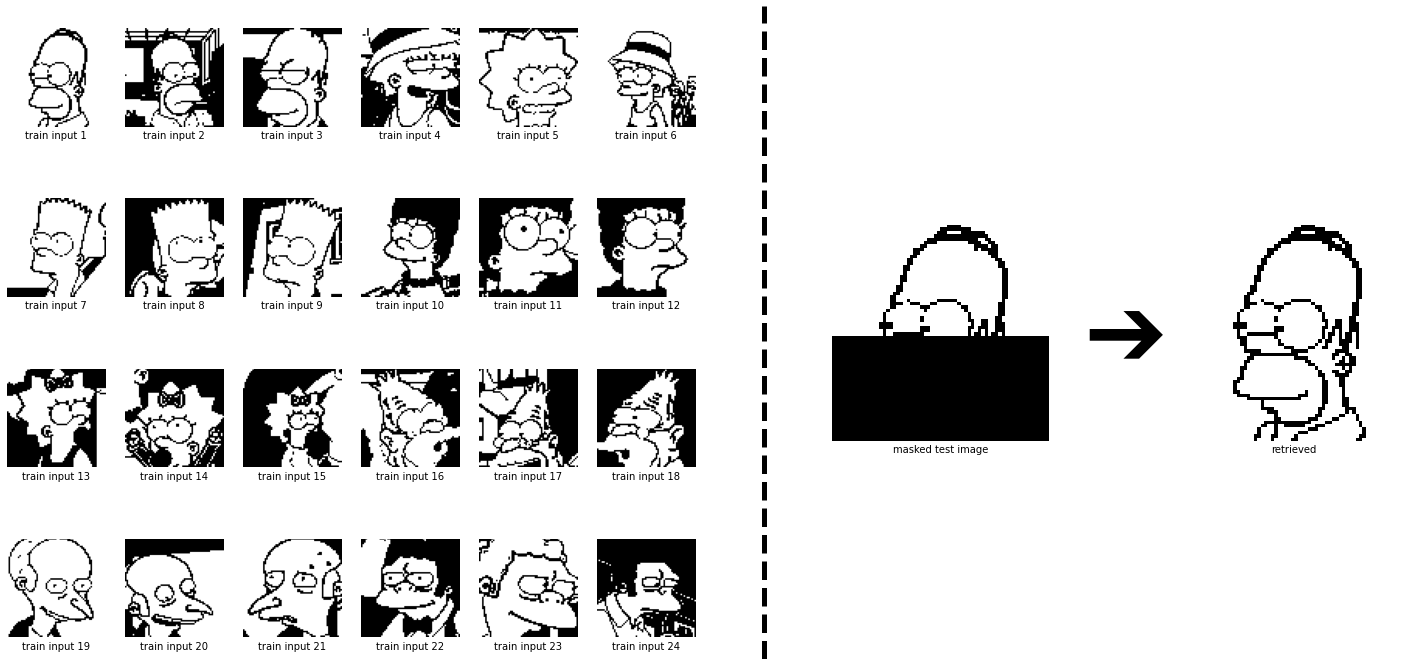

In [12]:
utils.plot_experiment_blog_style_24(train_patterns, test, reconstructed, orig_shape)

plt.savefig("experiment_with_24_patterns_dense.png", bbox_inches = 'tight', pad_inches=0, transparent=True,dpi=100)